In [1]:
import os
import pickle
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# January tweets
january = pd.read_csv("..\\CSV\\january_analyzed.csv", usecols=[
    'date', 'tokenized', 'polarity'], engine='python')

# February dataset
february = pd.read_csv('..\\CSV\\february_analyzed.csv', usecols=[
    'date', 'tokenized', 'polarity'], engine='python')

# March dataset
march = pd.read_csv('..\\CSV\\march_analyzed.csv', usecols=[
    'date', 'tokenized', 'polarity'], engine='python')

# April dataset
april = pd.read_csv('..\\CSV\\april_analyzed.csv', usecols=[
    'date', 'tokenized', 'polarity'], engine='python')

In [3]:
# Combine dataframes
frames = [january, february, march, april]
all_tweets = pd.concat(frames)

In [4]:
# Counts how many times a word is present in each da
# given a dataframe and a word
def word_count(dataframe, which_word):
    count = 0
    list_check = []
    list_tuple = []
    words = []
    for index, row in dataframe.iterrows():
        word = row['tokenized'].split()
        words.append(word)
        list_check = [j for i in words for j in i]
        count = list_check.count(which_word)
        list_tuple.append((row['date'], count))
        words = []
    df = pd.DataFrame(list_tuple, columns=['date', 'count'])
    df['date'] = df['date'].str.split(' ', expand=True)
    df['date'] = pd.to_datetime(df['date']).dt.round('1d')
    df = df.groupby(['date']).sum()
    df['average'] = df['count'].rolling(3).mean()
    df['exp_average'] = df['count'].ewm(3).mean()
    return df

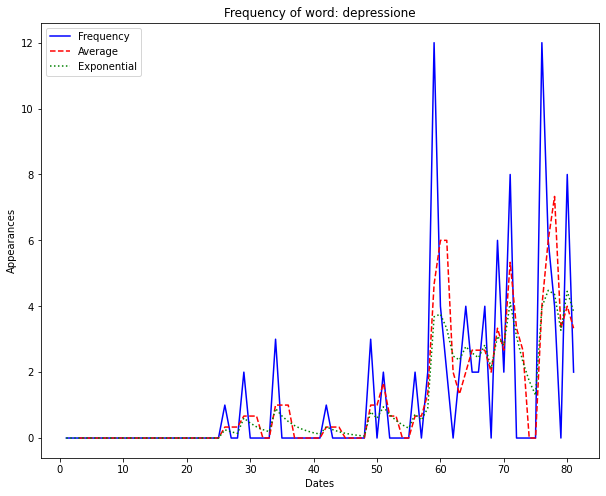

In [11]:
# The word to search
word = 'depressione'

# Plotting line graph word word ansia
dataframe = word_count(all_tweets, word)
fig, ax = plt.subplots(figsize=(10, 8))
x = range(1, dataframe.shape[0] + 1)

y = dataframe['count']
z = dataframe['average']
zz = dataframe['exp_average']
ax.plot(x, y, '-b', label='Frequency')
ax.plot(x, z, '--r', label='Average')
ax.plot(x, zz, ':g', label='Exponential')
plt.legend(loc="upper left")
plt.title('Frequency of word: ' + word)
plt.ylabel('Appearances')
plt.xlabel('Dates')
# plt.savefig('Results\Keywords\Single\\depressione.png')
plt.show()

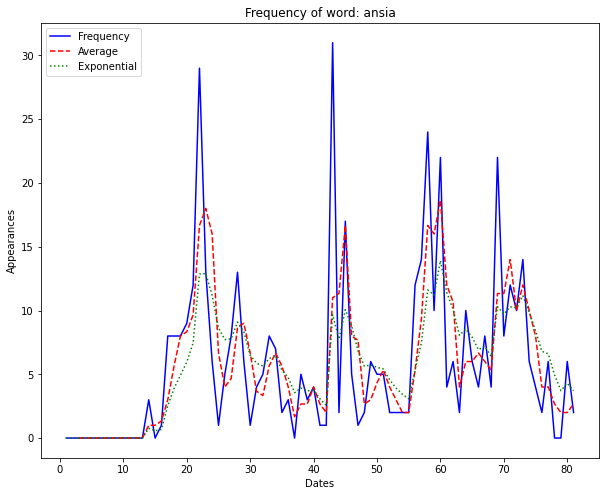

In [6]:
#The word to search
word = 'ansia'

# Plotting line graph word word ansia
dataframe = word_count(all_tweets, word)
fig, ax = plt.subplots(figsize=(10, 8))
x = range(1, dataframe.shape[0] + 1)
y = dataframe['count']
z = dataframe['average']
zz = dataframe['exp_average']
ax.plot(x, y, '-b', label='Frequency')
ax.plot(x, z, '--r', label='Average')
ax.plot(x, zz, ':g', label='Exponential')
plt.legend(loc="upper left")
plt.title('Frequency of word: ' + word)
plt.ylabel('Appearances')
plt.xlabel('Dates')
# plt.savefig('Results\Keywords\Single\\depressione.png')
plt.show()

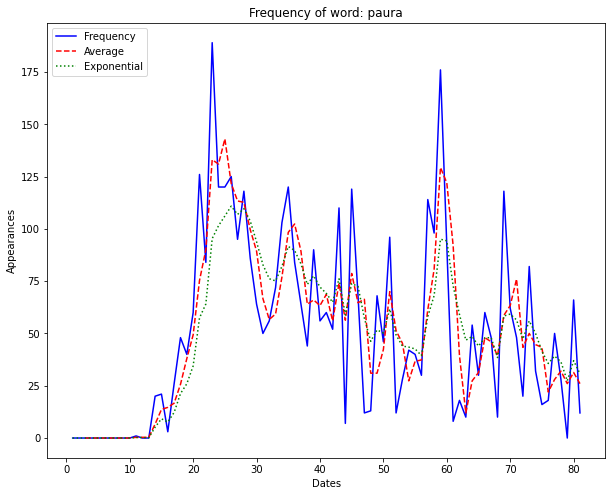

In [5]:
#The word to search
word = 'paura'

# Plotting line graph word word paura
dataframe = word_count(all_tweets, word)
fig, ax = plt.subplots(figsize=(10, 8))
x = range(1, dataframe.shape[0] + 1)
y = dataframe['count']
z = dataframe['average']
zz = dataframe['exp_average']
ax.plot(x, y, '-b', label='Frequency')
ax.plot(x, z, '--r', label='Average')
ax.plot(x, zz, ':g', label='Exponential')
plt.legend(loc="upper left")
plt.title('Frequency of word: ' + word)
plt.ylabel('Appearances')
plt.xlabel('Dates')
# plt.savefig('Results\Keywords\Single\\depressione.png')
plt.show()

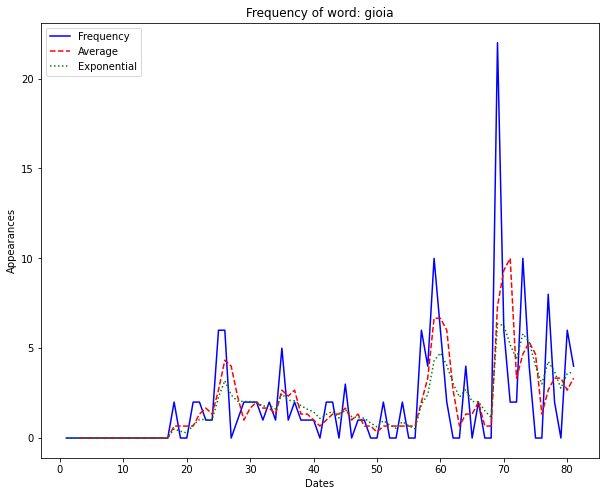

In [8]:
#The word to search
word = 'gioia'

# Plotting line graph word word paura
dataframe = word_count(all_tweets, word)
fig, ax = plt.subplots(figsize=(10, 8))
x = range(1, dataframe.shape[0] + 1)
y = dataframe['count']
z = dataframe['average']
zz = dataframe['exp_average']
ax.plot(x, y, '-b', label='Frequency')
ax.plot(x, z, '--r', label='Average')
ax.plot(x, zz, ':g', label='Exponential')
plt.legend(loc="upper left")
plt.title('Frequency of word: ' + word)
plt.ylabel('Appearances')
plt.xlabel('Dates')
# plt.savefig('Results\Keywords\Single\\gioia.png')
plt.show()